# Initializing and read files to numpy arrays

In [55]:
# env: HWW

### load files

In [56]:
# %matplotlib inline

import random
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep
import boost_histogram as bh
from sklearn.metrics import classification_report, roc_auc_score
from scipy import interpolate
from sklearn.metrics import roc_curve, auc
from cycler import cycler
import uproot ## means uproot4
import sklearn.metrics as m
import awkward as ak
import os

use_helvet = False ## true: use helvetica for plots, make sure the system have the font installed
if use_helvet:
    CMShelvet = hep.style.CMS
    CMShelvet['font.sans-serif'] = ['Helvetica', 'Arial']
    plt.style.use(CMShelvet)
else:
    plt.style.use(hep.style.CMS)

CustNanoData={
    'Signal': '/data/bond/zhaoyz/DeepDive/GluGluHToWW_Pt-200ToInf_M-125_TuneCP5_MINLO_13TeV-powheg-pythia8/Signal.root',
    'QCD'   : '/data/bond/zhaoyz/DeepDive/QCD_HT1000to1500_TuneCP5_PSWeights_13TeV-madgraph-pythia8/QCD.root',
}


files = {typefile : {} for typefile in CustNanoData}
for typefile in CustNanoData:
    files[typefile] = uproot.lazy({CustNanoData[typefile]: "deepntuplizer/tree" })
    


In [57]:
all_keys = [
    'probTopbWcs', 'probTopbWqq', 'probTopbWc', 'probTopbWs', 'probTopbWq', 'probTopbWev', 'probTopbWmv', 'probTopbWtauev', 'probTopbWtaumv', 'probTopbWtauhv', 
    'probTopWcs', 'probTopWqq', 'probTopWev', 'probTopWmv', 'probTopWtauev', 'probTopWtaumv', 'probTopWtauhv', 
    'probHbb', 'probHcc', 'probHss', 'probHqq', 'probHbc', 'probHbs', 'probHcs', 'probHgg', 'probHee', 'probHmm', 'probHtauhtaue', 'probHtauhtaum', 'probHtauhtauh', 
    'probHWWcscs', 'probHWWcsqq', 'probHWWqqqq', 'probHWWcsc', 'probHWWcss', 'probHWWcsq', 'probHWWqqc', 'probHWWqqs', 'probHWWqqq', 
    'probHWWcsev', 'probHWWqqev', 'probHWWcsmv', 'probHWWqqmv', 'probHWWcstauev', 'probHWWqqtauev', 'probHWWcstaumv', 'probHWWqqtaumv', 'probHWWcstauhv', 'probHWWqqtauhv', 
    'probHWxWxcscs', 'probHWxWxcsqq', 'probHWxWxqqqq', 'probHWxWxcsc', 'probHWxWxcss', 'probHWxWxcsq', 'probHWxWxqqc', 'probHWxWxqqs', 'probHWxWxqqq', 
    'probHWxWxcsev', 'probHWxWxqqev', 'probHWxWxcsmv', 'probHWxWxqqmv', 'probHWxWxcstauev', 'probHWxWxqqtauev', 'probHWxWxcstaumv', 'probHWxWxqqtaumv', 'probHWxWxcstauhv', 'probHWxWxqqtauhv', 
    'probHWxWxStarcscs', 'probHWxWxStarcsqq', 'probHWxWxStarqqqq', 'probHWxWxStarcsc', 'probHWxWxStarcss', 'probHWxWxStarcsq', 'probHWxWxStarqqc', 'probHWxWxStarqqs', 'probHWxWxStarqqq', 
    'probHWxWxStarcsev', 'probHWxWxStarqqev', 'probHWxWxStarcsmv', 'probHWxWxStarqqmv', 'probHWxWxStarcstauev', 'probHWxWxStarqqtauev', 'probHWxWxStarcstaumv', 'probHWxWxStarqqtaumv', 'probHWxWxStarcstauhv', 'probHWxWxStarqqtauhv', 
    'probHZZbbbb', 'probHZZbbcc', 'probHZZbbss', 'probHZZbbqq', 'probHZZcccc', 'probHZZccss', 'probHZZccqq', 'probHZZssss', 'probHZZssqq', 'probHZZqqqq', 'probHZZbbb', 'probHZZbbc', 'probHZZbbs', 'probHZZbbq', 'probHZZccb', 'probHZZccc', 'probHZZccs', 'probHZZccq', 'probHZZssb', 'probHZZssc', 'probHZZsss', 'probHZZssq', 'probHZZqqb', 'probHZZqqc', 'probHZZqqs', 'probHZZqqq', 
    'probHZZbbee', 'probHZZbbmm', 'probHZZbbe', 'probHZZbbm', 'probHZZbee', 'probHZZbmm', 'probHZZbbtauhtaue', 'probHZZbbtauhtaum', 'probHZZbbtauhtauh', 'probHZZbtauhtaue', 'probHZZbtauhtaum', 'probHZZbtauhtauh', 'probHZZccee', 'probHZZccmm', 'probHZZcce', 'probHZZccm', 'probHZZcee', 'probHZZcmm', 'probHZZcctauhtaue', 'probHZZcctauhtaum', 'probHZZcctauhtauh', 'probHZZctauhtaue', 'probHZZctauhtaum', 'probHZZctauhtauh', 'probHZZssee', 'probHZZssmm', 'probHZZsse', 'probHZZssm', 'probHZZsee', 'probHZZsmm', 'probHZZsstauhtaue', 'probHZZsstauhtaum', 'probHZZsstauhtauh', 'probHZZstauhtaue', 'probHZZstauhtaum', 'probHZZstauhtauh', 'probHZZqqee', 'probHZZqqmm', 'probHZZqqe', 'probHZZqqm', 'probHZZqee', 'probHZZqmm', 'probHZZqqtauhtaue', 'probHZZqqtauhtaum', 'probHZZqqtauhtauh', 'probHZZqtauhtaue', 'probHZZqtauhtaum', 'probHZZqtauhtauh', 
    'probHZxZxbbbb', 'probHZxZxbbcc', 'probHZxZxbbss', 'probHZxZxbbqq', 'probHZxZxcccc', 'probHZxZxccss', 'probHZxZxccqq', 'probHZxZxssss', 'probHZxZxssqq', 'probHZxZxqqqq', 'probHZxZxbbb', 'probHZxZxbbc', 'probHZxZxbbs', 'probHZxZxbbq', 'probHZxZxccb', 'probHZxZxccc', 'probHZxZxccs', 'probHZxZxccq', 'probHZxZxssb', 'probHZxZxssc', 'probHZxZxsss', 'probHZxZxssq', 'probHZxZxqqb', 'probHZxZxqqc', 'probHZxZxqqs', 'probHZxZxqqq', 
    'probHZxZxbbee', 'probHZxZxbbmm', 'probHZxZxbbe', 'probHZxZxbbm', 'probHZxZxbee', 'probHZxZxbmm', 'probHZxZxbbtauhtaue', 'probHZxZxbbtauhtaum', 'probHZxZxbbtauhtauh', 'probHZxZxbtauhtaue', 'probHZxZxbtauhtaum', 'probHZxZxbtauhtauh', 'probHZxZxccee', 'probHZxZxccmm', 'probHZxZxcce', 'probHZxZxccm', 'probHZxZxcee', 'probHZxZxcmm', 'probHZxZxcctauhtaue', 'probHZxZxcctauhtaum', 'probHZxZxcctauhtauh', 'probHZxZxctauhtaue', 'probHZxZxctauhtaum', 'probHZxZxctauhtauh', 'probHZxZxssee', 'probHZxZxssmm', 'probHZxZxsse', 'probHZxZxssm', 'probHZxZxsee', 'probHZxZxsmm', 'probHZxZxsstauhtaue', 'probHZxZxsstauhtaum', 'probHZxZxsstauhtauh', 'probHZxZxstauhtaue', 'probHZxZxstauhtaum', 'probHZxZxstauhtauh', 'probHZxZxqqee', 'probHZxZxqqmm', 'probHZxZxqqe', 'probHZxZxqqm', 'probHZxZxqee', 'probHZxZxqmm', 'probHZxZxqqtauhtaue', 'probHZxZxqqtauhtaum', 'probHZxZxqqtauhtauh', 'probHZxZxqtauhtaue', 'probHZxZxqtauhtaum', 'probHZxZxqtauhtauh', 
    'probHZxZxStarbbbb', 'probHZxZxStarbbcc', 'probHZxZxStarbbss', 'probHZxZxStarbbqq', 'probHZxZxStarcccc', 'probHZxZxStarccss', 'probHZxZxStarccqq', 'probHZxZxStarssss', 'probHZxZxStarssqq', 'probHZxZxStarqqqq', 'probHZxZxStarbbb', 'probHZxZxStarbbc', 'probHZxZxStarbbs', 'probHZxZxStarbbq', 'probHZxZxStarccb', 'probHZxZxStarccc', 'probHZxZxStarccs', 'probHZxZxStarccq', 'probHZxZxStarssb', 'probHZxZxStarssc', 'probHZxZxStarsss', 'probHZxZxStarssq', 'probHZxZxStarqqb', 'probHZxZxStarqqc', 'probHZxZxStarqqs', 'probHZxZxStarqqq', 
    'probHZxZxStarbbee', 'probHZxZxStarbbmm', 'probHZxZxStarbbe', 'probHZxZxStarbbm', 'probHZxZxStarbee', 'probHZxZxStarbmm', 'probHZxZxStarbbtauhtaue', 'probHZxZxStarbbtauhtaum', 'probHZxZxStarbbtauhtauh', 'probHZxZxStarbtauhtaue', 'probHZxZxStarbtauhtaum', 'probHZxZxStarbtauhtauh', 'probHZxZxStarccee', 'probHZxZxStarccmm', 'probHZxZxStarcce', 'probHZxZxStarccm', 'probHZxZxStarcee', 'probHZxZxStarcmm', 'probHZxZxStarcctauhtaue', 'probHZxZxStarcctauhtaum', 'probHZxZxStarcctauhtauh', 'probHZxZxStarctauhtaue', 'probHZxZxStarctauhtaum', 'probHZxZxStarctauhtauh', 'probHZxZxStarssee', 'probHZxZxStarssmm', 'probHZxZxStarsse', 'probHZxZxStarssm', 'probHZxZxStarsee', 'probHZxZxStarsmm', 'probHZxZxStarsstauhtaue', 'probHZxZxStarsstauhtaum', 'probHZxZxStarsstauhtauh', 'probHZxZxStarstauhtaue', 'probHZxZxStarstauhtaum', 'probHZxZxStarstauhtauh', 'probHZxZxStarqqee', 'probHZxZxStarqqmm', 'probHZxZxStarqqe', 'probHZxZxStarqqm', 'probHZxZxStarqee', 'probHZxZxStarqmm', 'probHZxZxStarqqtauhtaue', 'probHZxZxStarqqtauhtaum', 'probHZxZxStarqqtauhtauh', 'probHZxZxStarqtauhtaue', 'probHZxZxStarqtauhtaum', 'probHZxZxStarqtauhtauh', 
    'probQCDbb', 'probQCDcc', 'probQCDb', 'probQCDc', 'probQCDothers', 
    'resonanceMassCorr', 'visiableMassCorr',
]

# TBD: how to define lqq node and W tagger by the 316 classes
index_evqq_start = all_keys.index("probHWWcsev")
index_evqq_end = all_keys.index("probHWWqqev")

index_mvqq_start = all_keys.index("probHWWcsmv")
index_mvqq_end = all_keys.index("probHWWqqmv")

index_W_start = all_keys.index("probHcs")
index_W_end = all_keys.index("probHqq")

index_QCD_start = all_keys.index("probQCDbb")
index_QCD_end = all_keys.index("probQCDothers")

### plot dir

In [58]:
MAIN_DIR = "."

plot_dir = f"{MAIN_DIR}/plots/7May2014"
_ = os.system(f"mkdir -p {plot_dir}")

### cut the events by lepton pt

In [59]:
def cut_lep_pt(events,pt = 100):
    mask = ak.any(events["contained_lep_pt"] >= pt, axis=1)
    events_filtered = events[mask]
    return events_filtered

In [60]:
files_qcd_filtered = cut_lep_pt(files["QCD"],pt = 200)

In [61]:
files_sig_filtered = cut_lep_pt(files["Signal"],pt = 200)

### define taggers and combine signal & bkg samples

In [62]:
def get_evqq_node(events):
    #add from `probHWWcsev` to `probHWWqqtauhv` as lqq node
    events["evqq"] = ak.sum( events["jet_custom_discs"][:,index_evqq_start:index_evqq_end + 1], axis = 1)
    #add `probQCD` from `jet_custom_discs`
    events["qcd"] = ak.sum( events["jet_custom_discs"][:,index_QCD_start:index_QCD_end + 1], axis = 1)
    events["evqqvsqcd"] = events["evqq"]/(events["qcd"] + events["evqq"])
    
def get_mvqq_node(events):
    #add from `probHWWcsev` to `probHWWqqtauhv` as lqq node
    events["mvqq"] = ak.sum( events["jet_custom_discs"][:,index_mvqq_start:index_mvqq_end + 1], axis = 1)
    #add `probQCD` from `jet_custom_discs`
    events["qcd"] = ak.sum( events["jet_custom_discs"][:,index_QCD_start:index_QCD_end + 1], axis = 1)
    events["mvqqvsqcd"] = events["mvqq"]/(events["qcd"] + events["mvqq"])

def get_W_node(events):
    #add `probHqq` and `probHcs` as W node
    events["W"] = events["jet_custom_discs_2"][:,index_W_start] + events["jet_custom_discs_2"][:,index_W_end] 
    #add `probQCD` from `jet_custom_discs_2`
    events["qcd_2"] = ak.sum( events["jet_custom_discs_2"][:,index_QCD_start:index_QCD_end + 1], axis = 1)
    events["Wvsqcd"] = events["W"]/(events["qcd_2"] + events["W"])

In [63]:
#test
get_evqq_node(files["Signal"])
get_evqq_node(files["QCD"])
get_mvqq_node(files["Signal"])
get_mvqq_node(files["QCD"])


In [64]:
#test
get_W_node(files_qcd_filtered)
get_W_node(files_sig_filtered)

### define truth Hlqq jet

In [65]:
def get_truth_evqq(events):
    events["isevqq"] = (events["fj_label"] >= 39) & (events["fj_label"] <= 40) 
def get_truth_mvqq(events):
    events["ismvqq"] = (events["fj_label"] >= 41) & (events["fj_label"] <= 42) 
get_truth_evqq(files["Signal"])
get_truth_mvqq(files["QCD"])
get_truth_mvqq(files["Signal"])
get_truth_evqq(files["QCD"])
get_truth_mvqq(files_qcd_filtered)
get_truth_evqq(files_sig_filtered)
get_truth_evqq(files_qcd_filtered)
get_truth_mvqq(files_sig_filtered)

### combine signal & background arrays

In [66]:
files_combined = {}
files_combined_w = {}
var_list_1 = ["evqqvsqcd","mvqqvsqcd","isevqq","ismvqq"]
for var in var_list_1:
    files_combined[var] = np.hstack((files["Signal"][var],files["QCD"][var]))
var_list_2 = ["Wvsqcd","isevqq","ismvqq"]
for var in var_list_2:
    files_combined_w[var] = np.hstack((files_sig_filtered[var],files_qcd_filtered[var]))

### plot ROC

In [67]:
def plot_ROC(events, events_2, label_a = "evqq vs.QCD", label_b = "W vs.QCD(after removing lepton)",gen_match = "isevqq", tagger = "evqqvsqcd", legend_location='upper left'):
    """
    events: a dictionary, events.values() are collections of events
    """
    
    plt.figure(figsize=(12,12))
    ax=plt.gca()
    plt.grid()
    hep.cms.label(data=False, year="Full-Run2", ax=ax, fontname='sans-serif')
    plt.rcParams['axes.prop_cycle'] = cycler(color=['red','blue','green','darkorange','cyan','darkviolet'])
    plt.plot([plt.xlim()[0],plt.xlim()[1]], [0.01,0.01], linestyle="dashed", lw=2, color='gray')    
    

    #firstly plot lqq node
    fpr, tpr, _threshold = roc_curve(y_true=events[gen_match], y_score=events[tagger], pos_label=1 )
    plt.plot(tpr, fpr, linestyle="solid", lw=2, label= label_a) #+', AUC=%.2f%%'%(roc_auc[tagger][channel]*100))
    index=np.where(fpr==min(fpr, key=lambda x:abs(x-0.01), ))[0]
    plt.plot([tpr[index], tpr[index]], [plt.ylim()[0], 0.01], linestyle="dashed", lw=2, color='gray')

    #secondly plot W tagger
    fpr, tpr, _threshold = roc_curve(y_true=events_2[gen_match], y_score=events_2["Wvsqcd"], pos_label=1 )
    plt.plot(tpr, fpr, linestyle="solid", lw=2, label= label_b) #+', AUC=%.2f%%'%(roc_auc[tagger][channel]*100))
    index=np.where(fpr==min(fpr, key=lambda x:abs(x-0.01), ))[0]
    plt.plot([tpr[index], tpr[index]], [plt.ylim()[0], 0.01], linestyle="dashed", lw=2, color='gray')
    
    plt.xlim(0, 1)
    plt.ylim(1e-3,1)
    x_major_locator=plt.MultipleLocator(0.1)
    ax.xaxis.set_major_locator(x_major_locator)
    plt.xlabel('Hlqq signal efficiency', fontsize=25, ha='right', x=1)
    plt.ylabel('Mistag rate', fontsize=25, ha='right', y=1)
    plt.yscale('log')
    plt.xticks(size=14)
    plt.yticks(size=14)

    #plt.title('ROC Curve of HWW4q vs. QCD', fontsize=24,color="black")
    plt.legend(loc=legend_location,frameon=False,fontsize=21)
    # plt.text(0.03, 0.4e-0, "leptons have been removed when generating W tagger", fontsize=22, color="black")
   

    
    plt.savefig(f"{plot_dir}/ROC_{label_a}_{label_b}.pdf", bbox_inches='tight')
    plt.show()

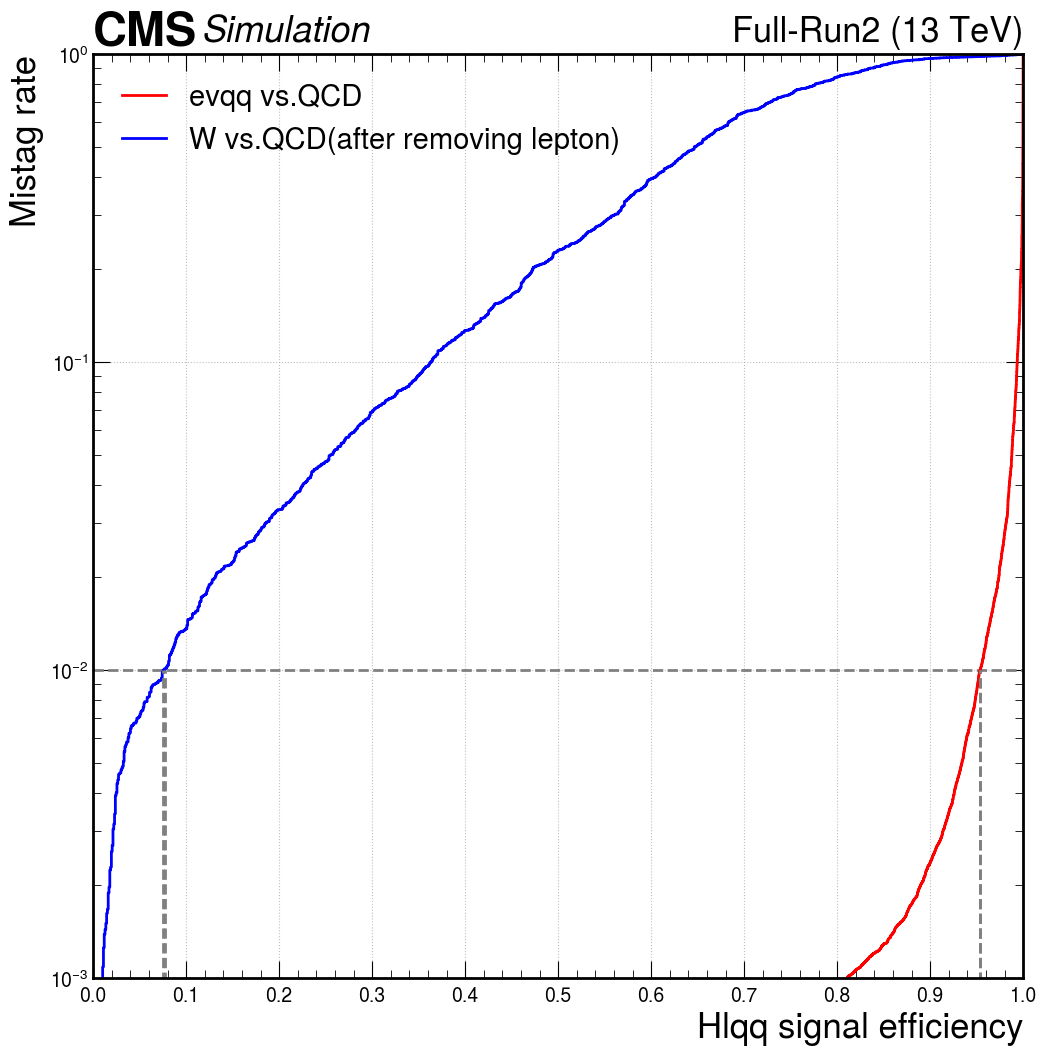

In [68]:
plot_ROC(files_combined,files_combined_w,label_a = "evqq vs.QCD", label_b = "W vs.QCD(after removing lepton)",gen_match = "isevqq", tagger = "evqqvsqcd")

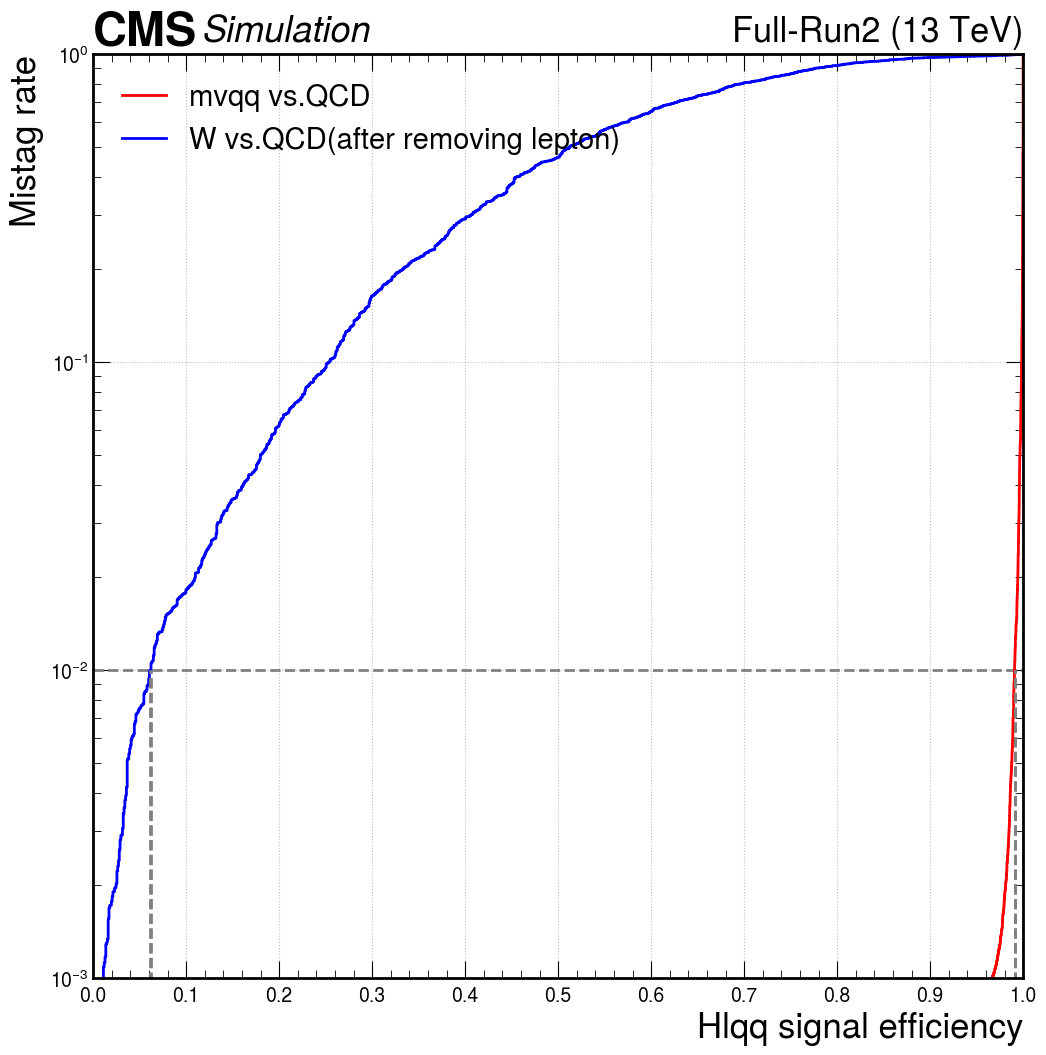

In [69]:
plot_ROC(files_combined,files_combined_w,label_a = "mvqq vs.QCD", label_b = "W vs.QCD(after removing lepton)",gen_match = "ismvqq", tagger = "mvqqvsqcd")